### Coincidencia de patrones

In [6]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
# %matplotlib inline
%matplotlib inline

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

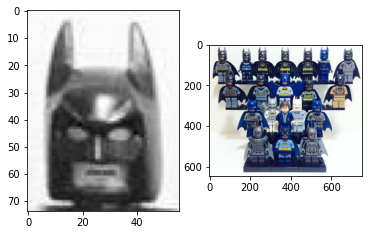

In [7]:
# Cargamos la imagen a procesar
img = cv.imread('batman_lego.jpg')

img_rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)
template = cv.imread('patron.png',0)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(template, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_rgb)

In [8]:
print(img_rgb.shape)

(646, 750, 3)


#### 1. Comparación según los distintos métodos

14.581410765369622


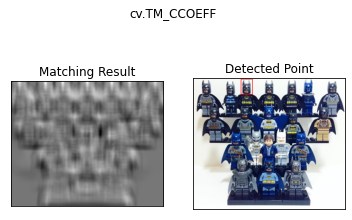

7.375075444919093


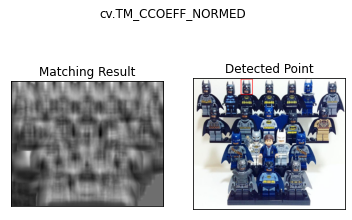

0.7667066146942361


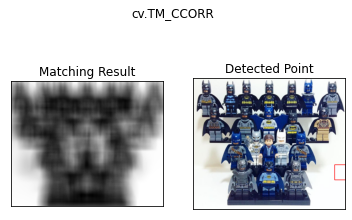

0.3805968435876317


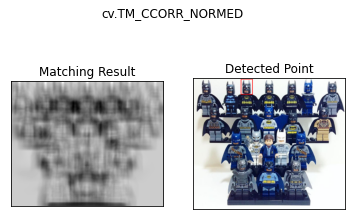

0.9999298859724499


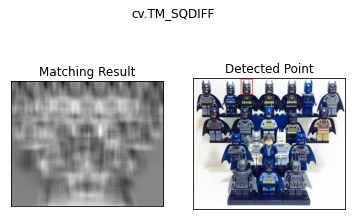

0.9999376901309954


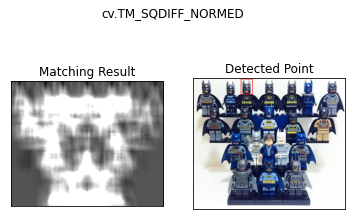

In [12]:
w, h = template.shape[::-1]
# Los 6 métodos posibles para comparación:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    # Hago una copia de la imagen porque ciclo a ciclo le dibujo rectángulos
    img_salida = img_rgb.copy()
    
    method = eval(meth)
    
    # Aplicamos la coincidencia de patrones
    #--------------------------------------
    res = cv.matchTemplate(img_gray, template, method)
    
    
    # Encontramos los valores máximos y mínimos
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    print((max_val-min_val)/(max_val+min_val))
    
    # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    # Marcamos el lugar donde lo haya encontrado
    #----------------------------------------
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img_salida,top_left, bottom_right, 255, 2)
    
    # Graficamos el procesamiento y la salida
    #----------------------------------------
    plt.figure()
    
    # Resultado de coincidencia
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    
    # Imagen original con recuadros
    plt.subplot(122),plt.imshow(img_salida)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    
    plt.suptitle(meth)
    plt.show()

#### 2. Coincidencia de patrones con objetos múltiples

561


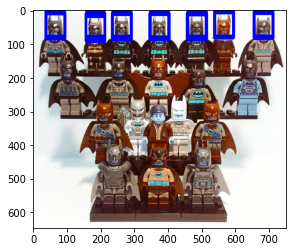

In [5]:
img_rgb = cv.imread('batman_lego.jpg')
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread('patron.png',0)

w, h = template.shape[::-1]
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
# Fijamos un umbral de "coincidencia"
threshold = 0.75

loc = np.where( res >= threshold)
count=0
for pt in zip(*loc[::-1]):
    count += 1
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)    
#cv.imwrite('res.png',img_rgb)
print(count)
plt.show()

In [22]:
res/10

array([[0.03954179, 0.03885187, 0.03796179, ..., 0.03563956, 0.03650329,
        0.03722046],
       [0.03978714, 0.03910532, 0.03822177, ..., 0.0357838 , 0.03665649,
        0.03737458],
       [0.04004292, 0.03937771, 0.0385096 , ..., 0.03592869, 0.03680516,
        0.03751852],
       ...,
       [0.03335375, 0.03335201, 0.0333504 , ..., 0.03350224, 0.03350224,
        0.03350224],
       [0.03336076, 0.03335892, 0.03335748, ..., 0.03350225, 0.03350224,
        0.03350225],
       [0.03336732, 0.03336553, 0.03336414, ..., 0.03350225, 0.03350224,
        0.03350225]], dtype=float32)